### How to load an excel file 
dependencies: 
1. pandas 
2. openpyxl

run this command: `pip3 install pandas openpyxl`
and to load an excel file, use `pandas.read_excel()`

In [ ]:
import pandas 

excel_file = './WPI Data.xlsx'

try: 
    df = pandas.read_excel(excel_file)
    print(df.head()) # print the first few rows of the excel
except Exception as error: 
    print(f"Couldnt find the excel file: {error}")

In [17]:
cols = df.columns # column names of the table

print(cols)
print(len(cols))

# to drop some columns from the table, we can use df.drop([list of columns that we want to drop])
# axis = 0 refers to rows and axis = 1 refers to columns
df = df.drop(['COMM_CODE', 'COMM_WT'], axis=1)


Index(['COMM_NAME', 'COMM_CODE', 'COMM_WT', 'INDX042012', 'INDX052012',
       'INDX062012', 'INDX072012', 'INDX082012', 'INDX092012', 'INDX102012',
       ...
       'INDX012023', 'INDX022023', 'INDX032023', 'INDX042023', 'INDX052023',
       'INDX062023', 'INDX072023', 'INDX082023', 'INDX092023', 'INDX102023'],
      dtype='object', length=142)
142


In [18]:
df

,COMM_NAME,INDX042012,INDX052012,INDX062012,INDX072012,INDX082012,INDX092012,INDX102012,INDX112012,INDX122012,...,INDX012023,INDX022023,INDX032023,INDX042023,INDX052023,INDX062023,INDX072023,INDX082023,INDX092023,INDX102023
0,Bajra,107.7,109.3,107.0,113.9,120.7,121.7,114.8,120.4,127.7,...,224.1,219.6,225.1,229.6,229.4,226.7,226.9,225.9,225.7,231.5
1,Moong,96.3,96.0,96.6,103.6,108.7,108.4,112.2,113.5,115.4,...,167.7,167.8,172.8,180.8,178.6,184.8,188.7,189.4,199.7,205.6
2,Masur,102.5,107.4,109.7,115.2,119.2,119.0,118.6,118.1,117.4,...,199.0,196.3,194.6,192.1,188.1,187.7,186.6,186.9,192.6,189.5
3,Peas/Chawali,113.2,123.1,134.3,147.4,143.3,153.8,146.6,131.8,124.8,...,160.4,160.2,166.9,195.5,199.5,196.0,215.9,219.8,227.4,237.6
4,Cauliflower,119.1,0.0,0.0,0.0,0.0,134.6,129.4,101.7,92.6,...,161.1,148.4,163.5,176.9,0.0,0.0,0.0,0.0,230.3,244.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,Gold & gold ornaments,91.2,88.2,85.2,91.9,87.9,102.3,106.5,108.2,98.8,...,151.1,154.0,154.3,159.9,158.5,158.2,151.0,154.9,155.0,153.7
865,b. Manufacture of musical instruments,108.8,101.6,107.5,117.4,103.0,112.2,100.0,105.0,102.2,...,185.6,200.4,201.4,193.9,187.7,181.1,193.1,179.0,180.3,189.4
866,Table Tennis Table,105.0,105.0,107.3,107.3,107.3,107.3,107.3,107.3,107.3,...,145.1,145.1,145.1,145.1,145.1,145.7,145.7,145.7,145.7,145.7
867,Plastic moulded-others toys,106.7,106.3,106.0,105.3,103.7,106.0,104.7,106.6,107.2,...,148.0,147.8,146.6,147.2,148.0,147.6,148.6,148.6,148.7,149.4


In [30]:
commodities = df['COMM_NAME'].unique()
indices_columns = [col for col in cols if col.startswith("INDX")]

# pick any random 5 commodities
import random 
random_commodities = random.sample(list(commodities), 5)
selected_data = df[df['COMM_NAME'].isin(random_commodities)].set_index('COMM_NAME')[indices_columns].T

selected_data.index = pandas.to_datetime(
    selected_data.index.str[4:],
    format="%m%Y"
)

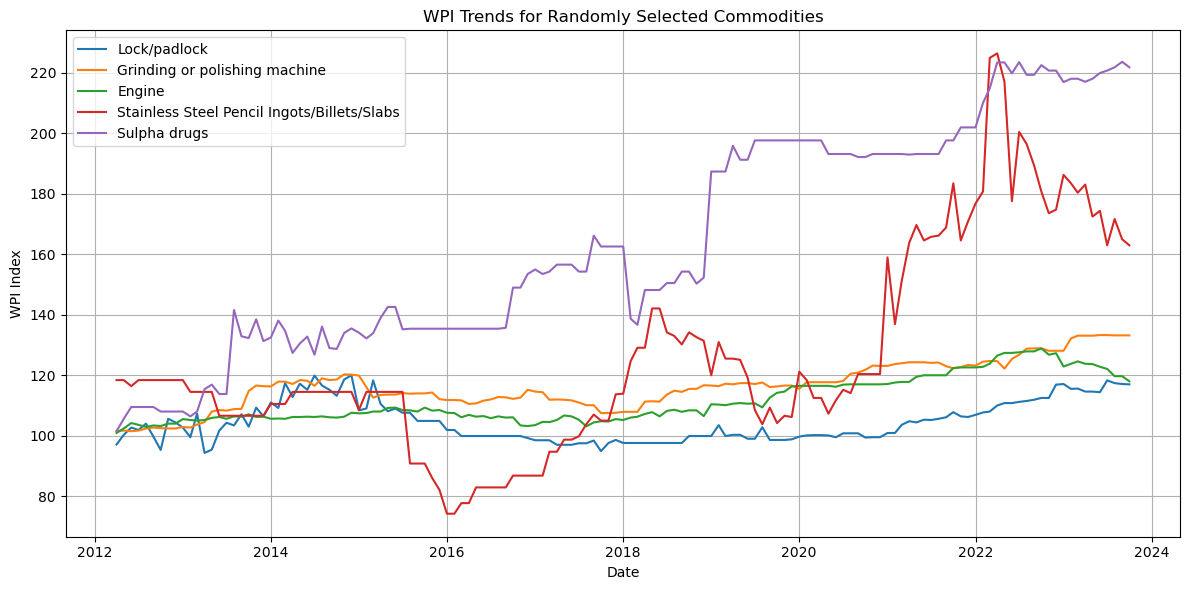

In [39]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
for commodity in random_commodities:
    plt.plot(selected_data.index, selected_data[commodity], label=commodity)

plt.title("WPI Trends for Randomly Selected Commodities")
plt.xlabel("Date")
plt.ylabel("WPI Index")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [51]:
correlation_matrix = df.set_index('COMM_NAME')[indices_columns].T.corr()

max_corr = correlation_matrix.stack().nlargest(2).iloc[1]
min_corr = correlation_matrix.stack().nsmallest(1).iloc[0]

max_corr_pair = correlation_matrix.stack().idxmax()
min_corr_pair = correlation_matrix.stack().idxmin()

print("Maximum Correlation:")
print(f"Commodities: {max_corr_pair}, Correlation: {max_corr:.2f}")

print("\nMinimum Correlation:")
print(f"Commodities: {min_corr_pair}, Correlation: {min_corr:.2f}")

Maximum Correlation:
Commodities: ('Bajra', 'Bajra'), Correlation: 1.00

Minimum Correlation:
Commodities: ('Aerated drinks/soft drinks (incl. soft drink concentrates)', 'Rubber Insulated Cables'), Correlation: -0.95


In [62]:
correlation_pairs = correlation_matrix.stack()

correlation_pairs = correlation_pairs[
    correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)
]

top_10_corr = correlation_pairs.nlargest(10)
bottom_10_corr = correlation_pairs.nsmallest(10)

print("Top 10 Maximum Correlations (Excluding Diagonal):")
for (comm1, comm2), corr in top_10_corr.items():
    print(f"{comm1} and {comm2}: {corr:.2f}")

print("\nBottom 10 Minimum Correlations:")
for (comm1, comm2), corr in bottom_10_corr.items():
    print(f"{comm1} and {comm2}: {corr:.2f}")


Top 10 Maximum Correlations (Excluding Diagonal):
n. Manufacture of processed ready to eat food and Instant Food/Prepared meals based on vegetables: 1.00
a. Manufacture of pharmaceuticals, medicinal chemical and botanical products and (K). MANUFACTURE OF PHARMACEUTICALS, MEDICINAL CHEMICAL AND BOTANICAL PRODUCTS: 1.00
Porcelain sanitary ware and c. Manufacture of clay building materials: 1.00
b. Metallic iron and Pig Iron: 1.00
e. Manufacture of measuring, testing, navigating and control equipment and Meter (non-electrical): 1.00
e. Manufacture of ovens, furnaces and furnace burners and Furnaces & Ovens: 1.00
Furnaces & Ovens and e. Manufacture of ovens, furnaces and furnace burners: 1.00
d. Manufacture of bicycles and invalid carriages and Bicycles of all types: 1.00
e. Manufacture of medical and dental instruments and supplies and Intraocular Lens: 1.00
Coking Coal and a. Coking Coal: 1.00

Bottom 10 Minimum Correlations:
Aerated drinks/soft drinks (incl. soft drink concentrates) and

In [63]:
correlation_matrix

COMM_NAME,Bajra,Moong,Masur,Peas/Chawali,Cauliflower,Okra (Lady finger),Beans,Drumstick,Orange,Cashew nut,...,EMU coaches,Motor cycles,Scooters,Bicycles of all types,(U). MANUFACTURE OF FURNITURE,Gold & gold ornaments,b. Manufacture of musical instruments,Table Tennis Table,Plastic moulded-others toys,Non Mechanical Toys
COMM_NAME,,,,,,,,,,,,,,,,,,,,,
Bajra,1.000000,0.606170,0.526631,0.715396,0.240978,0.431165,0.563399,0.328816,0.249762,0.423500,...,0.397572,0.818986,0.769466,0.811121,0.839393,0.745788,0.666996,0.785379,0.838042,0.858275
Moong,0.606170,1.000000,0.833516,0.590300,0.201241,0.281851,0.512149,0.265474,0.199719,0.201678,...,0.445976,0.703072,0.597969,0.612693,0.660944,0.818667,0.539507,0.660091,0.690352,0.697265
Masur,0.526631,0.833516,1.000000,0.440550,0.209821,0.239258,0.520053,0.293674,0.226236,0.267278,...,0.381639,0.603532,0.530083,0.542377,0.591254,0.815576,0.523787,0.504656,0.575891,0.570549
Peas/Chawali,0.715396,0.590300,0.440550,1.000000,0.281720,0.265208,0.509851,0.232005,0.048594,0.389171,...,0.440139,0.837282,0.761771,0.826709,0.811595,0.692892,0.664095,0.848445,0.835438,0.868011
Cauliflower,0.240978,0.201241,0.209821,0.281720,1.000000,0.507304,0.033863,0.484970,0.040613,0.192730,...,0.189992,0.284985,0.253049,0.293602,0.310016,0.256987,0.235178,0.277163,0.264883,0.323730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gold & gold ornaments,0.745788,0.818667,0.815576,0.692892,0.256987,0.414351,0.583597,0.324131,0.289018,0.436367,...,0.412460,0.884014,0.808264,0.804790,0.846844,1.000000,0.709574,0.769655,0.826736,0.841338
b. Manufacture of musical instruments,0.666996,0.539507,0.523787,0.664095,0.235178,0.488990,0.332804,0.378063,0.229052,0.837368,...,0.704140,0.728325,0.608973,0.899634,0.798257,0.709574,1.000000,0.864161,0.895109,0.847452
Table Tennis Table,0.785379,0.660091,0.504656,0.848445,0.277163,0.503363,0.442548,0.392499,0.246319,0.654732,...,0.620524,0.859159,0.741454,0.942564,0.869847,0.769655,0.864161,1.000000,0.954636,0.969464
